In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

## split data

from sklearn.model_selection import train_test_split

## preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## accuracy of model

from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score , accuracy_score

## tuning hyperparameters

from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , cross_val_score , cross_val_predict

## ANN

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense


2024-08-01 22:14:22.445352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 22:14:22.445490: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 22:14:22.624856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv("/kaggle/input/air-quality-data-in-india/air-quality-india.csv")
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [4]:
df.head(10).style.background_gradient(cmap="Reds")

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.510000
1,2017-11-07 13:00:00,2017,11,7,13,69.950000
2,2017-11-07 14:00:00,2017,11,7,14,92.790000
3,2017-11-07 15:00:00,2017,11,7,15,109.660000
4,2017-11-07 16:00:00,2017,11,7,16,116.500000
5,2017-11-07 17:00:00,2017,11,7,17,124.210000
6,2017-11-07 18:00:00,2017,11,7,18,123.450000
7,2017-11-07 19:00:00,2017,11,7,19,120.310000
8,2017-11-07 20:00:00,2017,11,7,20,108.750000
9,2017-11-07 21:00:00,2017,11,7,21,97.800000


In [5]:
df.sample(7)

,Timestamp,Year,Month,Day,Hour,PM2.5
11382,2019-04-26 07:00:00,2019,4,26,7,49.83
8319,2018-12-09 10:00:00,2018,12,9,10,62.63
22441,2020-09-28 00:00:00,2020,9,28,0,32.81
6760,2018-10-01 09:00:00,2018,10,1,9,35.82
23835,2020-11-25 05:00:00,2020,11,25,5,86.36
10150,2019-03-03 23:00:00,2019,3,3,23,54.53
14864,2019-10-29 04:00:00,2019,10,29,4,56.37


In [6]:
df["Month"].value_counts()

Month
1     3546
3     3529
12    3428
2     3250
5     3212
11    3203
4     3083
10    2814
6     2743
9     2495
8     2492
7     2397
Name: count, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,36192.0,2019.682278,1.345011,2017.00,2019.00,2020.00,2021.00,2022.00
Month,36192.0,6.331841,3.593321,1.00,3.00,6.00,10.00,12.00
Day,36192.0,15.716401,8.859769,1.00,8.00,16.00,23.00,31.00
Hour,36192.0,11.477840,6.925088,0.00,5.00,11.00,17.00,23.00
PM2.5,36192.0,49.308429,24.863511,7.02,28.08,45.73,64.52,245.63


In [8]:
df.groupby("Day")["Hour"].sum()

Day
1     13918
2     14517
3     14058
4     13785
5     13652
6     13686
7     13616
8     12996
9     13423
10    13595
11    14040
12    13666
13    13643
14    13261
15    13312
16    12883
17    12702
18    12890
19    13454
20    13685
21    14103
22    13794
23    13851
24    14057
25    13821
26    14291
27    13801
28    13532
29    12888
30    12413
31     8073
Name: Hour, dtype: int64

In [9]:
df[df["Day"]==df["Hour"]].max()

Timestamp    2022-06-04 04:00:00
Year                        2022
Month                         12
Day                           23
Hour                          23
PM2.5                     143.01
dtype: object

In [10]:
df["PM2.5"].max()

245.63

In [11]:
df["PM2.5"].sort_values(ascending=False).head(10)

7649     245.63
14836    234.83
7650     232.03
14837    230.05
7648     223.21
14835    219.07
7646     212.56
7647     207.41
23588    196.88
23593    193.80
Name: PM2.5, dtype: float64

In [12]:
df.tail()

,Timestamp,Year,Month,Day,Hour,PM2.5
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29
36191,2022-06-04 15:00:00,2022,6,4,15,40.67


In [13]:
df.shape

(36192, 6)

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
36187    False
36188    False
36189    False
36190    False
36191    False
Length: 36192, dtype: bool

In [15]:
df["Day"].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30,  1,  2,  3,  4,  5,  6, 31])

In [16]:
df.corr(numeric_only=True)

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.242207,0.008962,-0.000731,-0.221233
Month,-0.242207,1.000000,0.007797,-0.002514,0.003921
Day,0.008962,0.007797,1.000000,0.001403,-0.015409
Hour,-0.000731,-0.002514,0.001403,1.000000,0.052866
PM2.5,-0.221233,0.003921,-0.015409,0.052866,1.000000


In [17]:
df.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [18]:
df.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [19]:
df.describe(include="object")

,Timestamp
count,36192
unique,36192
top,2017-11-07 12:00:00
freq,1


In [20]:
c=df.corr(numeric_only=True)[["Year","Month"]]
c

,Year,Month
Year,1.000000,-0.242207
Month,-0.242207,1.000000
Day,0.008962,0.007797
Hour,-0.000731,-0.002514
PM2.5,-0.221233,0.003921


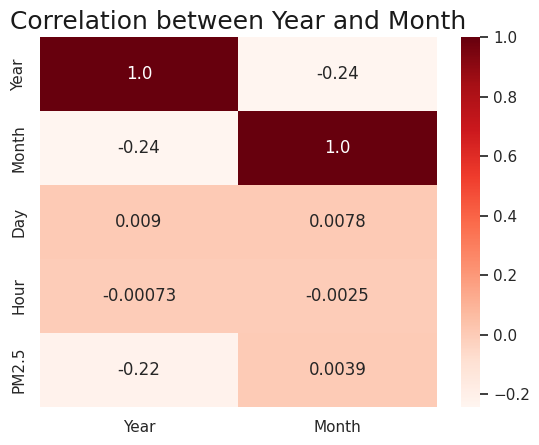

In [21]:
sns.heatmap(c,annot=True,fmt=".2",cmap="Reds")
plt.title("Correlation between Year and Month",fontsize=18,c="k")
plt.show()

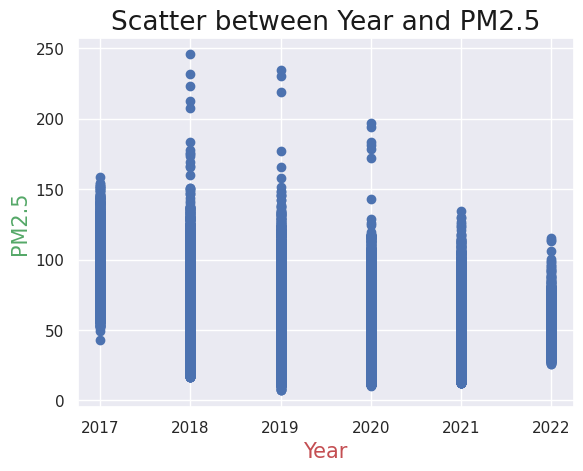

In [22]:
plt.scatter(x=df["Year"],y=df["PM2.5"])
plt.title("Scatter between Year and PM2.5",c="k",fontsize=19)
plt.xlabel("Year",fontsize=15,c="r")
plt.ylabel("PM2.5",fontsize=15,c="g")
plt.show()

/tmp/ipykernel_33/4063646573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Year"],bins=30)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


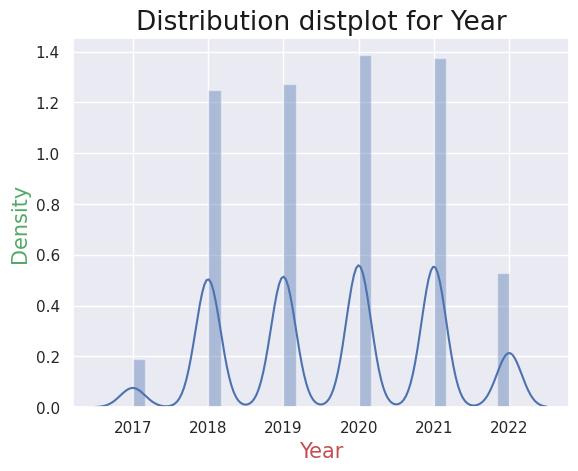

In [23]:
sns.distplot(x=df["Year"],bins=30)
plt.title("Distribution distplot for Year",c="k",fontsize=19)
plt.xlabel("Year",fontsize=15,c="r")
plt.ylabel("Density",fontsize=15,c="g")
plt.show()


/tmp/ipykernel_33/2220998558.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Day"],bins=20)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


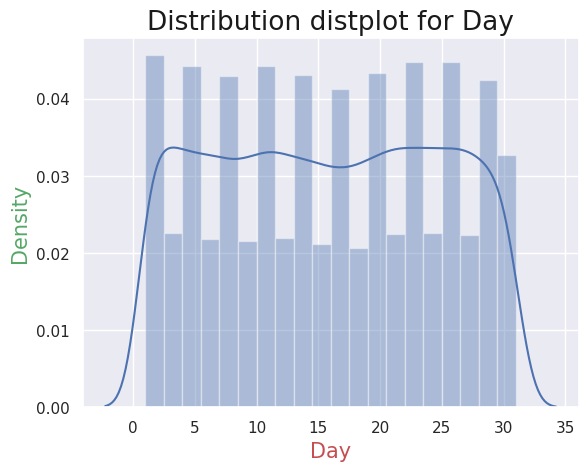

In [24]:
sns.distplot(x=df["Day"],bins=20)
plt.title("Distribution distplot for Day",c="k",fontsize=19)
plt.xlabel("Day",fontsize=15,c="r")
plt.ylabel("Density",fontsize=15,c="g")
plt.show()


/tmp/ipykernel_33/2339403099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["Month"],bins=25)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


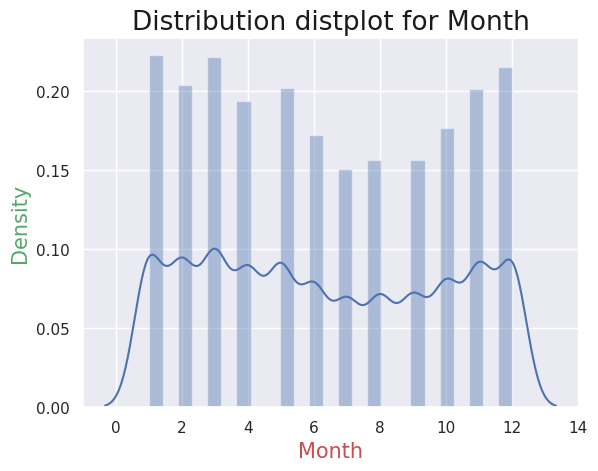

In [25]:
sns.distplot(x=df["Month"],bins=25)
plt.title("Distribution distplot for Month",c="k",fontsize=19)
plt.xlabel("Month",fontsize=15,c="r")
plt.ylabel("Density",fontsize=15,c="g")
plt.show()

/tmp/ipykernel_33/4012911310.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df["PM2.5"],bins=28)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


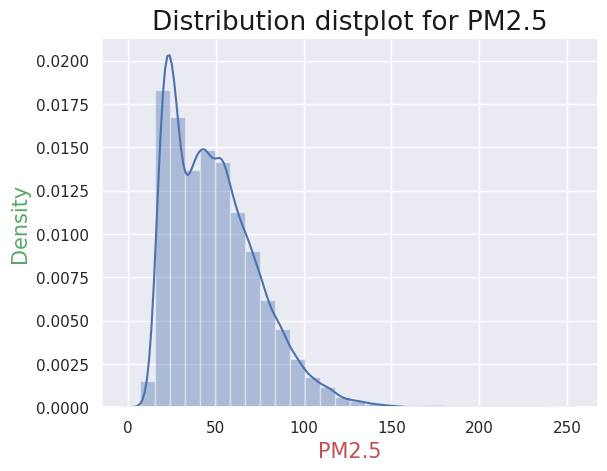

In [26]:
sns.distplot(x=df["PM2.5"],bins=28)
plt.title("Distribution distplot for PM2.5",c="k",fontsize=19)
plt.xlabel("PM2.5",fontsize=15,c="r")
plt.ylabel("Density",fontsize=15,c="g")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


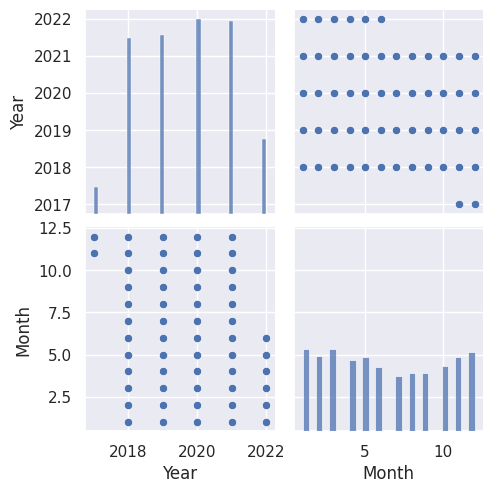

In [27]:
sns.pairplot(df,vars=["Year","Month"])
plt.show()

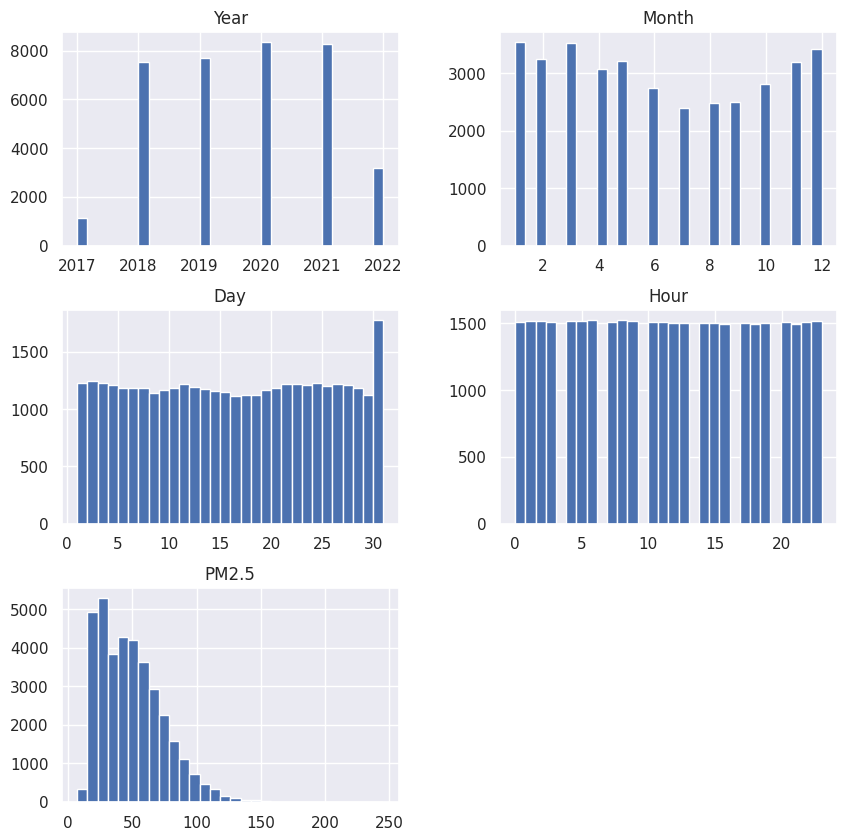

In [28]:
df.hist(bins=30,figsize=(10,10))
plt.show()

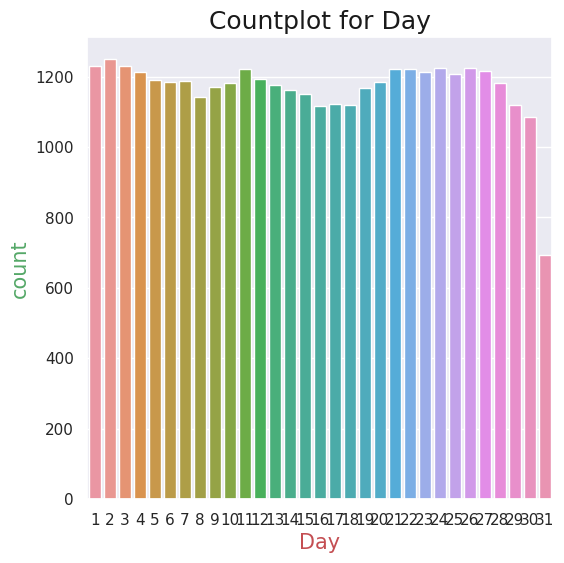

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="Day")
plt.title("Countplot for Day",c="k",fontsize=18)
plt.xlabel("Day",c="r",fontsize=15)
plt.ylabel("count",c="g",fontsize=15)
plt.show()

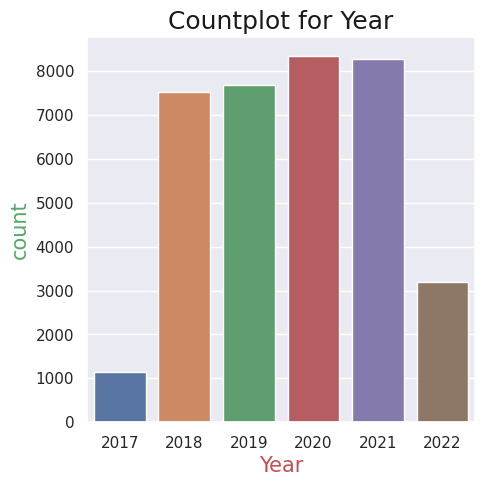

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="Year")
plt.title("Countplot for Year",c="k",fontsize=18)
plt.xlabel("Year",c="r",fontsize=15)
plt.ylabel("count",c="g",fontsize=15)
plt.show()

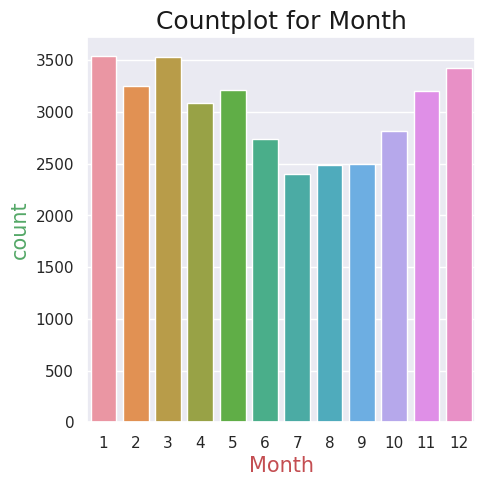

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x="Month")
plt.title("Countplot for Month",c="k",fontsize=18)
plt.xlabel("Month",c="r",fontsize=15)
plt.ylabel("count",c="g",fontsize=15)
plt.show()

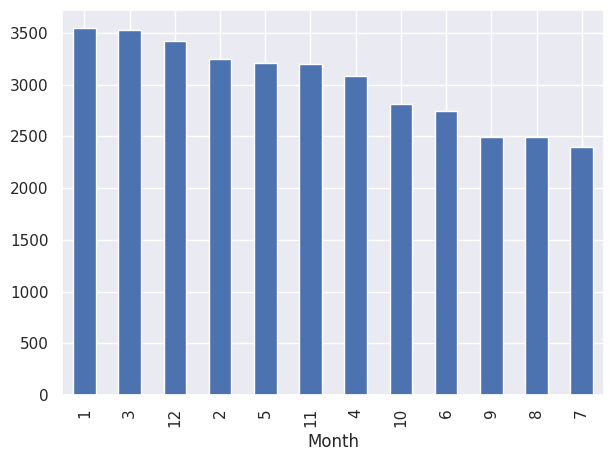

In [32]:
plt.figure(figsize=(7,5))
df.Month.value_counts().plot(kind="bar")
plt.show()

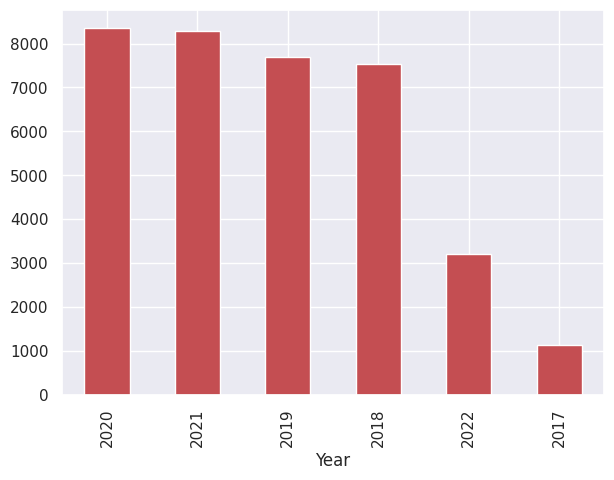

In [33]:
plt.figure(figsize=(7,5))
df.Year.value_counts().plot(kind="bar",color="r")
plt.show()

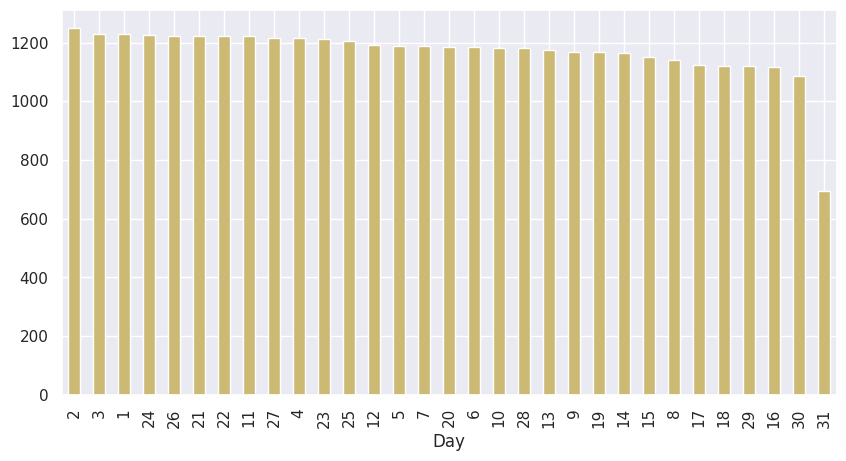

In [34]:
plt.figure(figsize=(10,5))
df.Day.value_counts().plot(kind="bar",color="y")
plt.show()

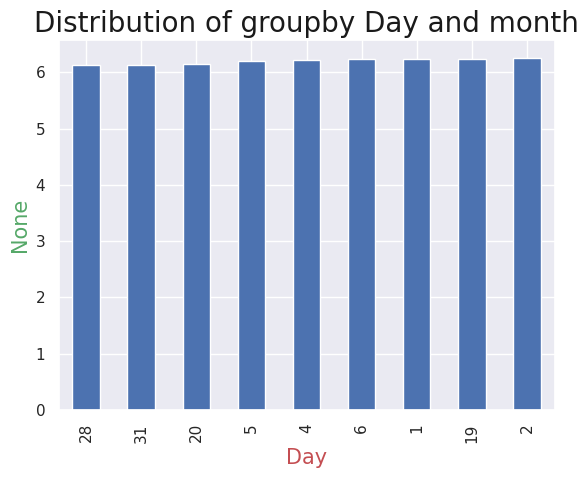

In [35]:
df.groupby("Day")["Month"].mean().sort_values().head(9).plot(kind="bar")
plt.title("Distribution of groupby Day and month",c="k",fontsize=20)
plt.xlabel("Day",fontsize=15,c="r")
plt.ylabel("None",fontsize=15,c="g")
plt.show()

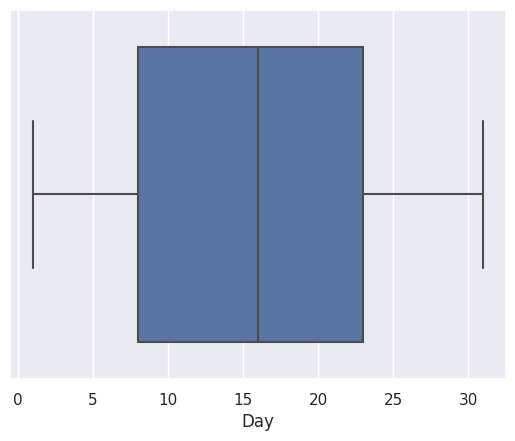

In [36]:
sns.boxplot(data=df,x="Day")
plt.show()

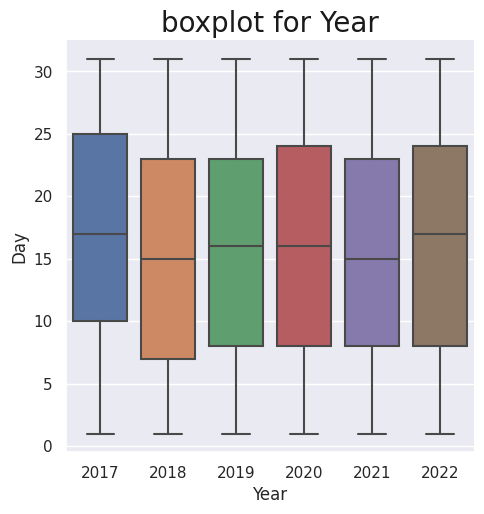

In [37]:
sns.catplot(x="Year",y="Day",data=df,kind="box")
plt.title("boxplot for Year",fontsize=20,c="k")
plt.show()

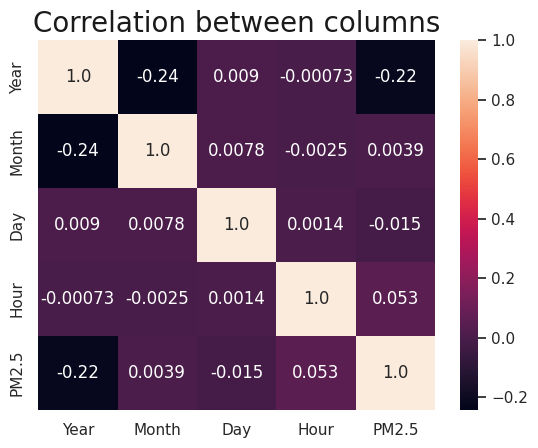

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2")
plt.title("Correlation between columns",fontsize=20,c="k")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

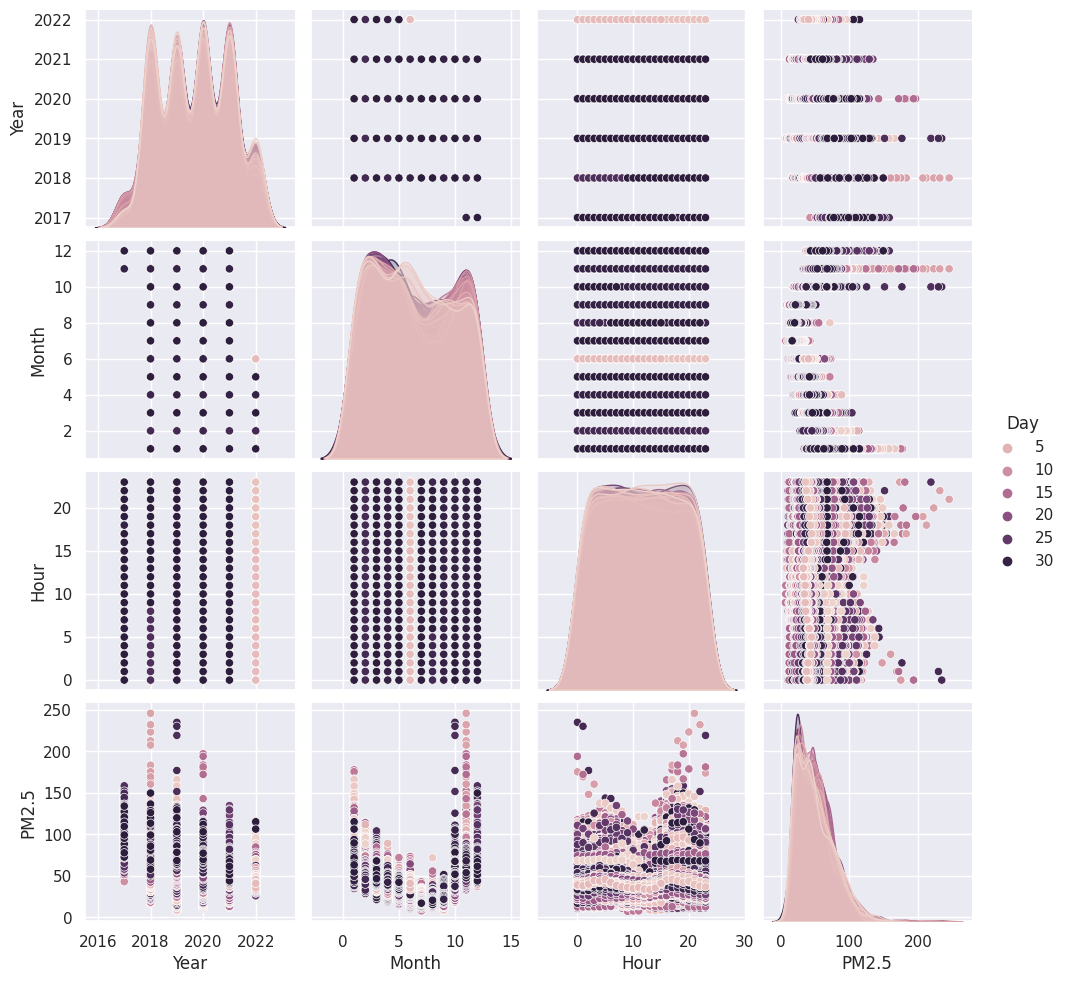

In [39]:
sns.pairplot(df,hue="Day")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


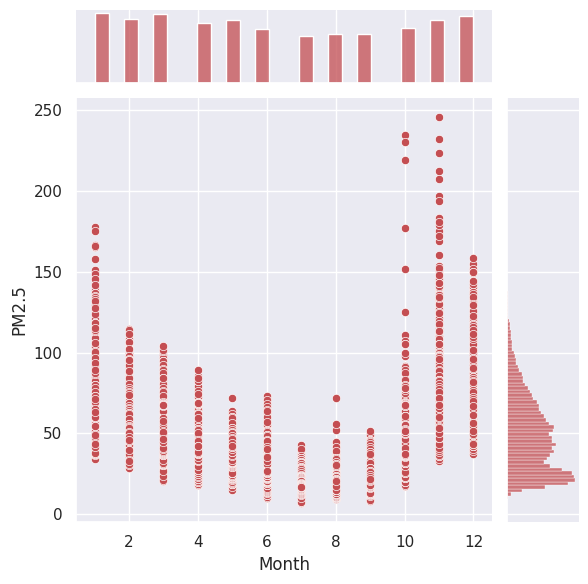

In [40]:
sns.jointplot(x="Month",y="PM2.5",data=df,color="r")
plt.show()

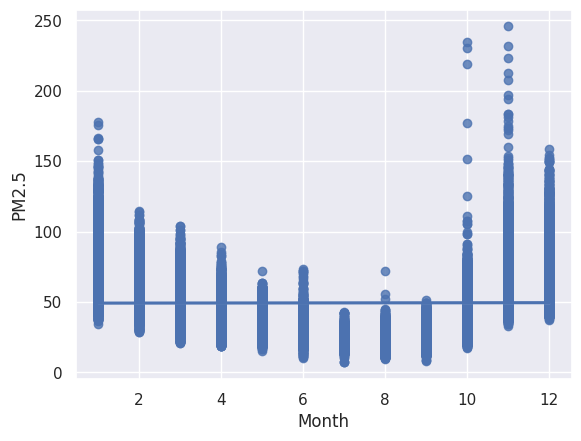

In [41]:
sns.regplot(x="Month",y="PM2.5",data=df)
plt.show()

<Figure size 1000x1000 with 0 Axes>

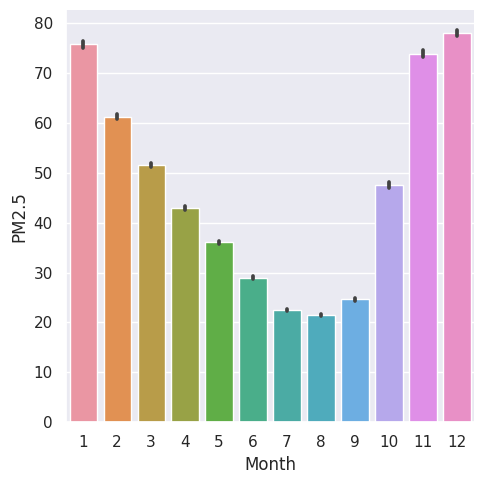

In [42]:
plt.figure(figsize=(10,10))
sns.catplot(x="Month",y="PM2.5",data=df,kind="bar")
plt.show()

<Figure size 2000x1000 with 0 Axes>

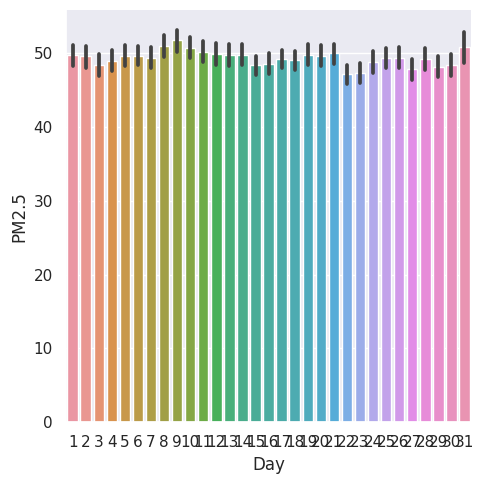

In [43]:
plt.figure(figsize=(20,10))
sns.catplot(x="Day",y="PM2.5",data=df,kind="bar")
plt.show()

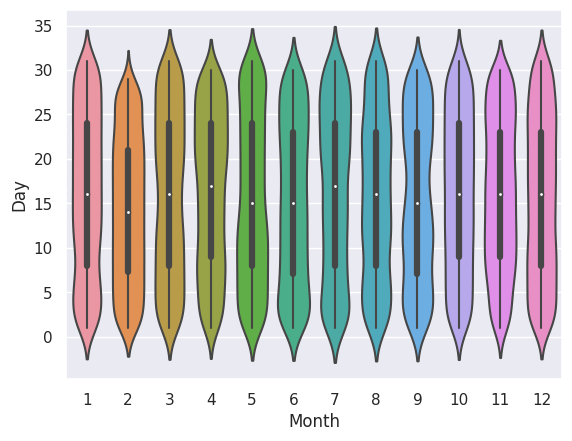

In [44]:
sns.violinplot(x="Month",y="Day",data=df)
plt.show()

In [45]:
plt.figure(figsize=(5,5))
fig=px.histogram(df,x="Day",color="Day")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<Figure size 500x500 with 0 Axes>

In [46]:
plt.figure(figsize=(5,5))
fig=px.histogram(df,x="Year",color="Year")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Figure size 500x500 with 0 Axes>

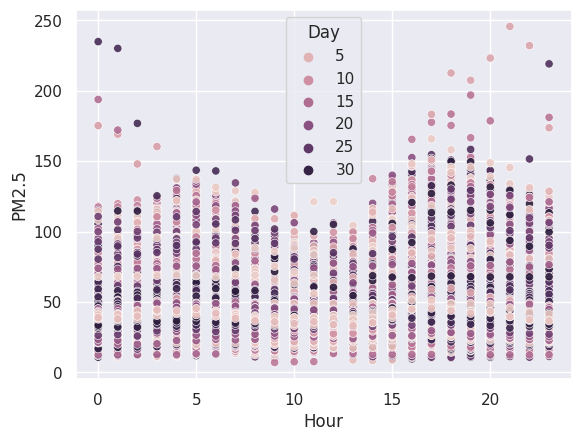

In [47]:
sns.scatterplot(data=df,x="Hour",y="PM2.5",hue="Day",alpha=0.9)
plt.show()

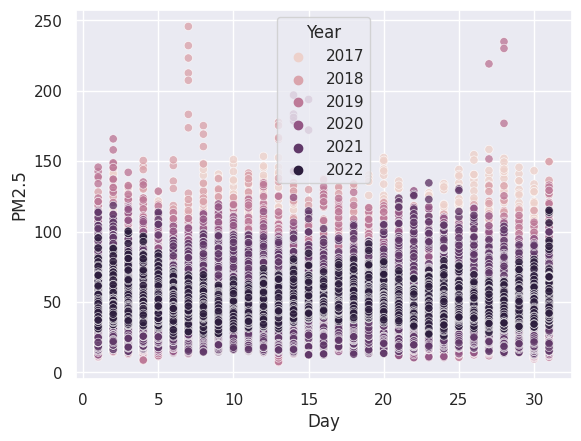

In [48]:
sns.scatterplot(data=df,x="Day",y="PM2.5",hue="Year",alpha=0.8)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

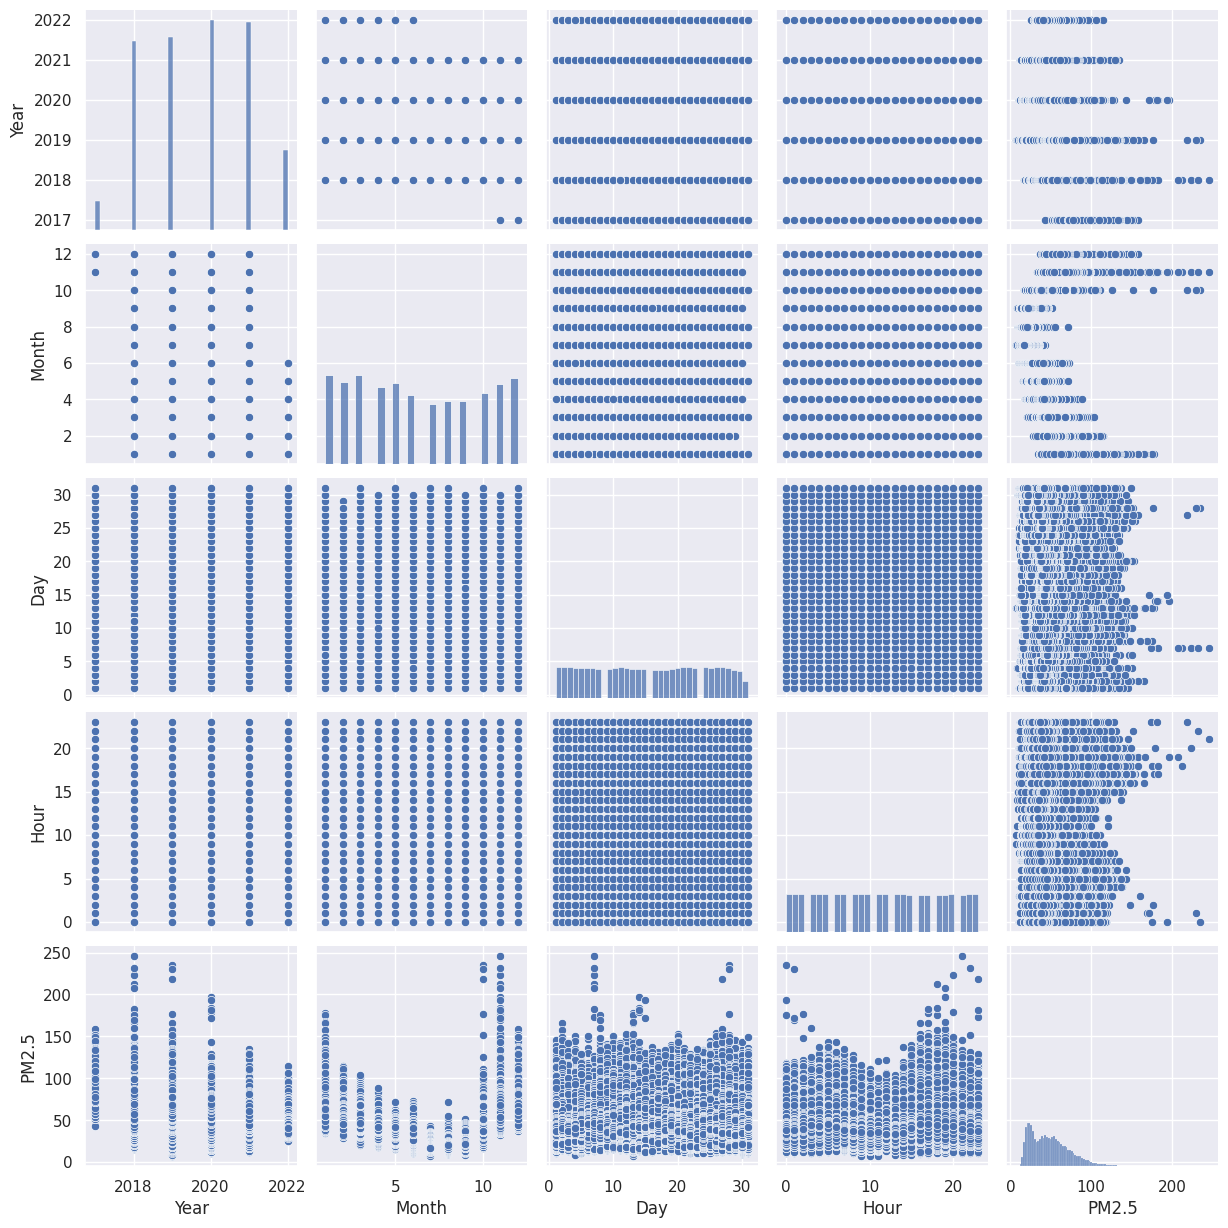

In [49]:
sns.pairplot(df)
plt.show()

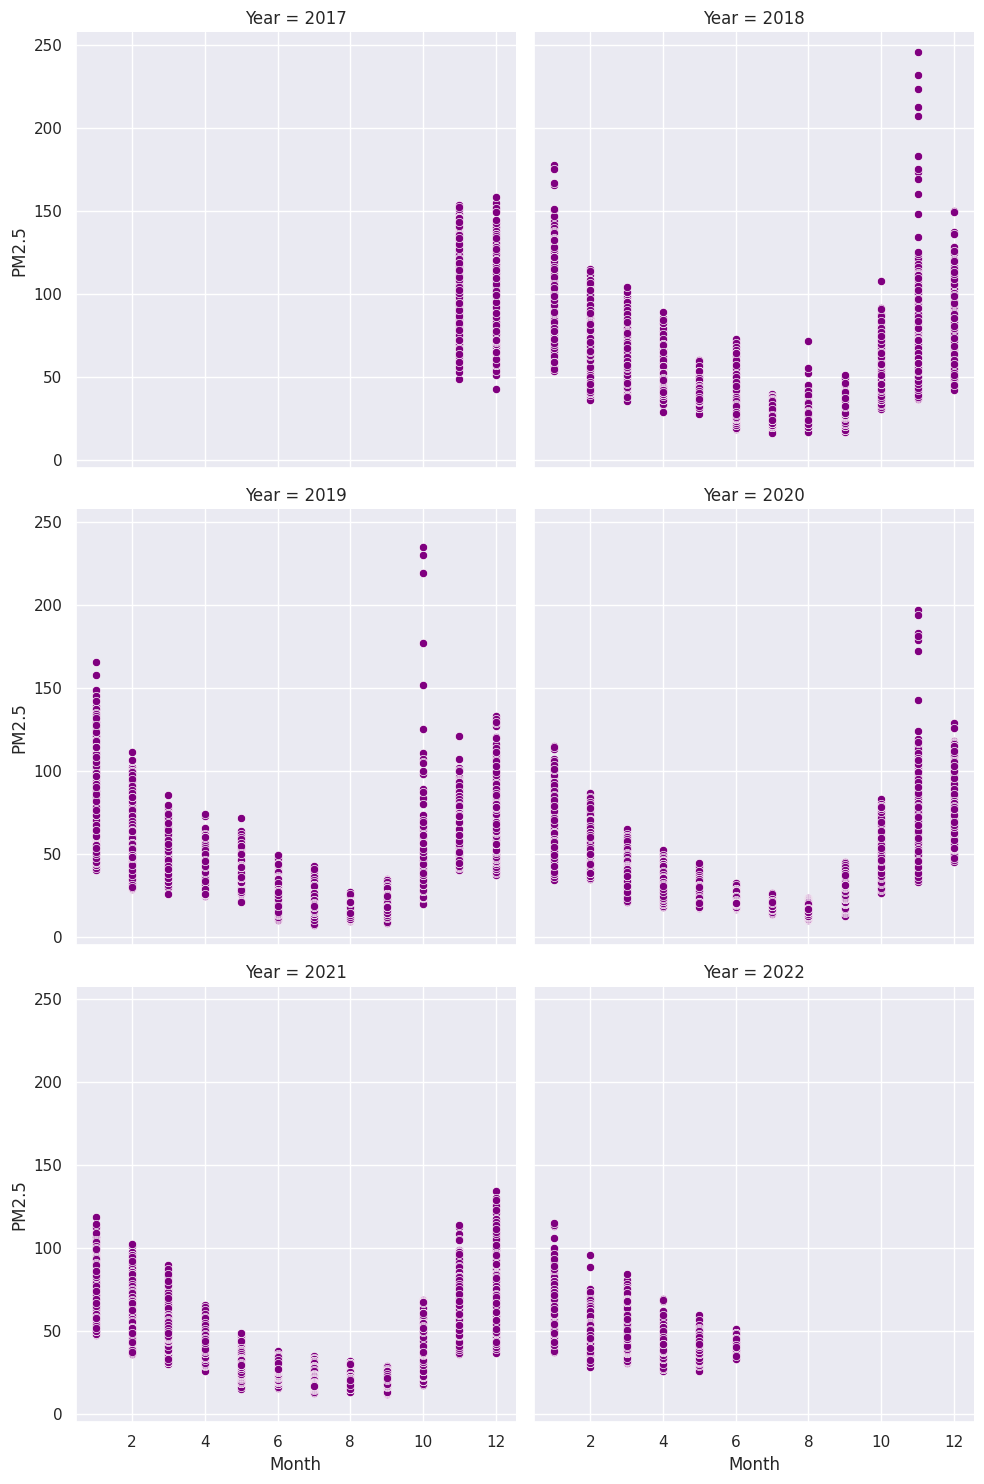

In [50]:
sns.relplot(x="Month",y="PM2.5",data=df,col="Year",col_wrap=2,color="purple")
plt.show()

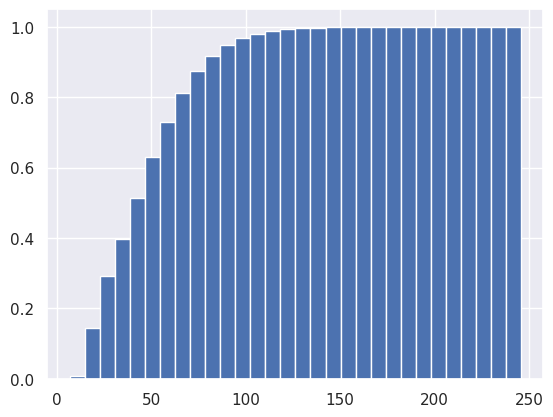

In [51]:
plt.hist(df["PM2.5"],bins=30,cumulative=True,density=True)
plt.show()

In [52]:
data=df.drop(["Timestamp","Hour"],axis=1)
data

,Year,Month,Day,PM2.5
0,2017,11,7,64.51
1,2017,11,7,69.95
2,2017,11,7,92.79
3,2017,11,7,109.66
4,2017,11,7,116.50
...,...,...,...,...
36187,2022,6,4,35.89
36188,2022,6,4,33.83
36189,2022,6,4,33.05
36190,2022,6,4,35.29


In [53]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [54]:
x

array([[2017,   11,    7],
       [2017,   11,    7],
       [2017,   11,    7],
       ...,
       [2022,    6,    4],
       [2022,    6,    4],
       [2022,    6,    4]])

In [55]:
y

array([64.51, 69.95, 92.79, ..., 33.05, 35.29, 40.67])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,
                                              test_size=0.2,
                                              shuffle=True)

In [57]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (28953, 3)
x_test shape (7239, 3)
y_train shape (28953,)
y_test shape (7239,)


RandomForest

In [58]:
rf=RandomForestRegressor(max_depth=7,n_estimators=9,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=9, random_state=42)

In [59]:
rf.score(x_train,y_train)

0.8111365835435783

In [60]:
mse_score_rf=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=6,
                            n_jobs=4,scoring="neg_mean_squared_error")

mse_score_rf=-1*mse_score_rf
mse_score_rf

array([123.73561131, 110.13073008, 127.78779681, 118.3160375 ,
       129.50103439, 113.04188085])

In [61]:
y_pred_rf=cross_val_predict(estimator=rf,X=x_train,y=y_train,cv=6,
                           n_jobs=5,method="predict")

y_pred_rf

array([ 53.06821582,  62.63944195,  65.26642113, ...,  41.87429783,
       103.75141997,  72.51718592])

In [62]:
mse_rf=mean_squared_error(y_train,y_pred_rf)
mse_rf

120.41886222319539

In [63]:
rmse_rf=np.sqrt(mse_rf)
rmse_rf

10.973552853255658

In [64]:
## tuning by GridSearchCV

parms_test={"n_estimators":[10,20,35,40],
           "max_features":[2,4,6,8]}

grid_search=GridSearchCV(estimator=rf,param_grid=parms_test,cv=7,
                        return_train_score=False)


In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=7,
             estimator=RandomForestRegressor(max_depth=7, n_estimators=9,
                                             random_state=42),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 35, 40]})

In [66]:
## get best model hyperparameters

best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=7, max_features=4, n_estimators=20,
                      random_state=42)

In [67]:
## get best score

score_best=grid_search.best_score_
score_best

0.8053212980822958

In [68]:
## tuning by RandomizedSearch

parms_test={"n_estimators":[10,15,20,25],
           "max_depth":[2,6,10,14],
           }

random_search=RandomizedSearchCV(estimator=rf,
                                 param_distributions=parms_test,
                                n_iter=10,
                                 cv=7,
                                 random_state=42)


In [69]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=7,
                   estimator=RandomForestRegressor(max_depth=7, n_estimators=9,
                                                   random_state=42),
                   param_distributions={'max_depth': [2, 6, 10, 14],
                                        'n_estimators': [10, 15, 20, 25]},
                   random_state=42)

In [70]:
## get best hyperparameters

best_model=random_search.best_estimator_
best_model

RandomForestRegressor(max_depth=14, n_estimators=25, random_state=42)

In [71]:
##get best score

best_score=random_search.best_score_
best_score

0.8351693802221621

LinearRegression

In [72]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
lr.score(x_train,y_train)

0.052547167976160214

In [74]:
mse_score_lr=cross_val_score(estimator=lr,X=x_train,y=y_train,
                      cv=5,n_jobs=3,scoring="neg_mean_squared_error")
mse_score_lr= 1*mse_score_lr
mse_score_lr

array([-599.1839281 , -579.84330337, -586.95588474, -591.53602345,
       -574.09836407])

In [75]:

y_pred_lr=cross_val_predict(estimator=lr,X=x_train,
                         y=y_train,cv=9,
                         n_jobs=8)

y_pred_lr
                     

array([57.20714696, 41.71398147, 58.72478763, ..., 53.01650778,
       58.98848881, 50.72302846])

In [76]:
mse_lr=mean_squared_error(y_train,y_pred_lr)
mse_lr

586.3846599432944

In [77]:
rmse_lr=np.sqrt(mse_lr)
rmse_lr

24.215380648325443

In [78]:
clf=SVR(kernel="rbf",C=0.9)
clf.fit(x_train,y_train)

SVR(C=0.9)

In [79]:
clf.score(x_train,y_train)

-0.020241324209274936

In [80]:
mse_score_clf=cross_val_score(estimator=clf,X=x_train,y=y_train,cv=7,
                             n_jobs=5,scoring="neg_mean_squared_error")

mse_score_clf= -1*mse_score_clf
mse_score_clf

array([650.52341268, 642.89675733, 623.28865732, 624.94097052,
       624.87745595, 629.44312572, 622.5552583 ])

In [81]:
y_pred_clf=cross_val_predict(estimator=clf,X=x_train,
                         y=y_train,cv=9,
                         n_jobs=8)

y_pred_clf
                     

array([45.90027336, 45.85203758, 45.87505449, ..., 45.90617974,
       45.88585534, 45.86854918])

In [82]:
mse_clf=mean_squared_error(y_train,y_pred_clf)
mse_clf

631.2477455303327

In [83]:
rmse=np.sqrt(mse_clf)
rmse

25.124644187138905

ANN

In [84]:
model=Sequential()
model.add(Dense(128,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))

summary=model.summary()

model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

y_pred=model.predict(x_train)

mse=mean_squared_error(y_train,y_pred)
mae=mean_absolute_error(y_train,y_pred)

print("mean_squared_error",mse)
print("mean_absolute_error",mae)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1003.6295
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 648.6028
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 637.0475
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 623.6968
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 631.1872
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 618.8295
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 627.5667
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 631.5123
Epoch 9/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 629.0770
Epoch 10/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 621.4007
Epoch 11/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 625.9920
Epoch 12/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 638.7573
Epoch 13/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 622.4745
Epoch 14/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 641.6699
Epoch 15/50
905/905 ━━━━━━━━